# Statistics of AotM-2011 Dataset

In [2]:
%matplotlib inline
import os, sys
import json, gzip, codecs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
data_dir = 'data/aotm-2011'

In [4]:
fname = os.path.join(data_dir, 'aotm2011_playlists.json.gz')
reader = codecs.getreader("utf-8")
with gzip.open(fname, 'r') as fd:
    playlists = json.load(reader(fd))

In [5]:
#playlists[0]

In [6]:
lengths = [len(playlists[j]['playlist']) for j in range(len(playlists))]

In [7]:
print('#Playlists:', len(lengths))

#Playlists: 101343


Histogram of playlist length.

Text(0,0.5,'#Playlists')

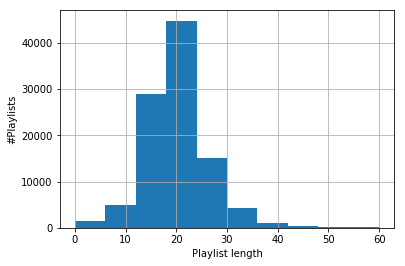

In [15]:
ax = plt.subplot(111)
pd.Series(lengths).hist(ax=ax)
ax.set_xlabel('Playlist length')
ax.set_ylabel('#Playlists')
#ax.set_yscale('log')

Categories.

In [16]:
cats = [playlists[j]['category'] for j in range(len(playlists))]

In [17]:
print('#Categories:', np.unique(cats).shape[0])

#Categories: 43


In [18]:
counter = Counter(cats)

In [19]:
#counter

In [20]:
X = sorted([key for key in counter])
Y = [counter[key] for key in X]

Scatter plot of the number of playlists for all categories.

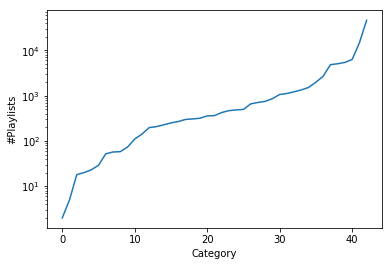

In [21]:
ax = plt.subplot(111)
#ax.set_xlabel('Category (ID)')
ax.set_xlabel('Category')
ax.set_ylabel('#Playlists')
ax.set_yscale('log')
#ax.plot(Y)
ax.plot(sorted(Y))

Playlists in which all tracks are in MSD: **too few!**

In [22]:
#subset_ix = [j for j in range(len(playlists)) \
#             if len(playlists[j]['playlist']) == len([x for y in playlists[j]['filtered_lists'] for x in y])]

In [23]:
#len(subset_ix)

In [27]:
#subsubset_ix = [ix for ix in subset_ix if len(playlists[ix]['playlist']) > 1]
#len(subsubset_ix)

The *Filtered_lists* field is grouped by some unknown properity!

In [28]:
subset_ix = [ix for ix in range(len(playlists)) if len(playlists[ix]['filtered_lists']) > 1]
len(subset_ix)

93985

In [34]:
idx = subset_ix[10]
print(len(playlists[idx]['playlist']))
print(len(playlists[idx]['filtered_lists']))
print(len([st[1] for st in playlists[idx]['playlist'] if st[1] is not None]))

26
5
12


In [35]:
playlists[idx]

{'category': 'Mixed Genre',
 'filtered_lists': [['SOYDAVA12A8C13FD10',
   'SOHHDAW12A8C1384BA',
   'SOGIEOU12A8C134815'],
  ['SOSBDKK12A8C13F61F'],
  ['SODQBJT12A8C1339E9',
   'SOBILME12A6701EEAB',
   'SOTVPHW12A8C13EED6',
   'SOCWOIJ12AB0187087'],
  ['SORILGN12A5891EC2B', 'SOSKHHS12D0219A596', 'SOKXADL12AB0183307'],
  ['SOGBYUP12A8C1390B1']],
 'mix_id': 21415,
 'playlist': [[['goldfrapp', 'u.k. girls (physical)'], None],
  [['poe', 'junkie'], None],
  [['david arnold w/ nina persson', 'theme from "randall and hopkirk"'], None],
  [['bis', 'the end is today'], None],
  [['kylie minogue', 'fever'], None],
  [['jill scott', 'long walk'], 'SOYDAVA12A8C13FD10'],
  [['tricky', 'your name'], 'SOHHDAW12A8C1384BA'],
  [['bjork', 'human behaviour (live)'], 'SOGIEOU12A8C134815'],
  [['the cardigans', 'country hell'], None],
  [['ivy', 'undertow'], 'SOSBDKK12A8C13F61F'],
  [["eve's plum", 'eye'], None],
  [['unkle', 'chaos'], None],
  [['cat power', 'cross bones style'], 'SODQBJT12A8C1339E9'],
  

In [45]:
#playlists_subset = [playlists[ix] for ix in subsubset_ix]

In [48]:
#len(playlists_subset)

241

Rebuild the list of song IDs for each playlist, ignore songs without ID or playlist with only one song ID.

In [36]:
playlists_songIDs = [[st[1] for st in playlists[idx]['playlist'] if st[1] is not None] \
                     for idx in range(len(playlists))]

In [37]:
len(playlists_songIDs)

101343

In [38]:
playlists_subset = [sl for sl in playlists_songIDs if len(sl) > 1]

In [39]:
len(playlists_subset)

95298

In [44]:
playlists_subset[0]

['SOFDPDC12A58A7D198',
 'SOPIEQP12A8C13F268',
 'SOKMCJK12A6D4F6105',
 'SOGTGJR12A6310E08D',
 'SOLTBYJ12A6310F2BB',
 'SOBOXXN12A6D4FA1A2',
 'SOUQUFO12B0B80778E']

In [48]:
lengths_subset = [len(sl) for sl in playlists_subset]
print('Average #Songs in playlist: %.1f' % np.mean(lengths_subset))

Average #Songs in playlist: 9.4


Text(0,0.5,'#Playlists')

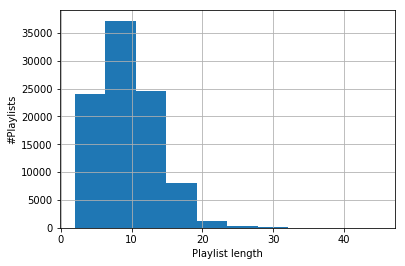

In [49]:
ax = plt.subplot(111)
pd.Series(lengths_subset).hist(ax=ax)
ax.set_xlabel('Playlist length')
ax.set_ylabel('#Playlists')
#ax.set_yscale('log')

In [50]:
import pickle as pkl

In [52]:
pkl.dump(playlists_subset, open(os.path.join(data_dir, 'aotm-2011-subset.pkl'), 'wb'))

### Check multiple ground truth

Assume query is:
- `query = (start_song)`
- `query = (start_song, length)`
- `query = (start_song, length, user)`

In [18]:
query_dict0 = dict()
query_dict1 = dict()
query_dict2 = dict()

In [19]:
for ix in range(len(playlists)):
    playlist = playlists[ix]['playlist']
    if len(playlist) == 0: continue
    
    track0_name = str.upper(playlist[0][0][1])
    user_name = str.upper(playlists[ix]['user']['name'])
    ntracks = len(playlists[ix]['playlist'])
    
    q0 = track0_name
    q1 = (track0_name, ntracks)
    q2 = (track0_name, ntracks, user_name)
    try:
        query_dict0[q0].append(ix)
    except KeyError:
        query_dict0[q0] = [ix]
    try:
        query_dict1[q1].append(ix)
    except KeyError:
        query_dict1[q1] = [ix]
    try:
        query_dict2[q2].append(ix)
    except KeyError:
        query_dict2[q2] = [ix]

In [21]:
#query_dict0

In [22]:
#query_dict1

In [23]:
#query_dict2

queries with multiple ground truths.

In [24]:
queries0 = sorted([q0 for q0 in query_dict0 if len(query_dict0[q0]) > 1])

In [25]:
print('query = start_song')
print('Queries with multiple ground truth: %d/%d, ratio: %.2f%%' % \
      (len(queries0), len(query_dict0), 100*len(queries0) / len(query_dict0)))

query = start_song
Queries with multiple ground truth: 14280/57719, ratio: 24.74%


In [26]:
queries1 = sorted([q1 for q1 in query_dict1 if len(query_dict1[q1]) > 1])

In [27]:
print('query = (start_song, length)')
print('Queries with multiple ground truth: %d/%d, ratio: %.2f%%' % \
      (len(queries1), len(query_dict1), 100*len(queries1) / len(query_dict1)))

query = (start_song, length)
Queries with multiple ground truth: 7390/90828, ratio: 8.14%


In [28]:
queries2 = sorted([q2 for q2 in query_dict2 if len(query_dict2[q2]) > 1])

In [29]:
print('query = (start_song, length, user)')
print('Queries with multiple ground truth: %d/%d, ratio: %.2f%%' % \
      (len(queries2), len(query_dict2), 100*len(queries2) / len(query_dict2)))

query = (start_song, length, user)
Queries with multiple ground truth: 933/100128, ratio: 0.93%
